In [ ]:
%pip install pandas

In [4]:
import pandas as pd

In [5]:
cleaned_test = pd.read_csv('data/cleaned_test.csv')
encoded_cleaned_test = pd.read_csv('data/encoded_cleaned_test.csv')
updated = pd.read_csv('data/updated.csv')


In [6]:
cleaned_test.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           11399 non-null  object 
 1   Delivery_person_ID           11399 non-null  object 
 2   Delivery_person_Age          10908 non-null  float64
 3   Delivery_person_Ratings      10892 non-null  float64
 4   Restaurant_latitude          11399 non-null  float64
 5   Restaurant_longitude         11399 non-null  float64
 6   Delivery_location_latitude   11399 non-null  float64
 7   Delivery_location_longitude  11399 non-null  float64
 8   Order_Date                   11399 non-null  object 
 9   Time_Orderd                  10955 non-null  object 
 10  Time_Order_picked            11399 non-null  object 
 11  Weather                      11241 non-null  object 
 12  Road_traffic_density         11245 non-null  object 
 13  Vehicle_conditio

In [27]:

encoded_cleaned_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           11399 non-null  object 
 1   Delivery_person_ID           11399 non-null  object 
 2   Delivery_person_Age          10908 non-null  float64
 3   Delivery_person_Ratings      10892 non-null  float64
 4   Restaurant_latitude          11399 non-null  float64
 5   Restaurant_longitude         11399 non-null  float64
 6   Delivery_location_latitude   11399 non-null  float64
 7   Delivery_location_longitude  11399 non-null  float64
 8   Order_Date                   11399 non-null  object 
 9   Time_Orderd                  10955 non-null  object 
 10  Time_Order_picked            11399 non-null  object 
 11  Weather                      11399 non-null  int64  
 12  Road_traffic_density         11399 non-null  int64  
 13  Vehicle_conditio

In [21]:
updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2442 entries, 0 to 2441
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   2442 non-null   int64  
 1   ID                           2442 non-null   object 
 2   Delivery_person_ID           2442 non-null   object 
 3   Delivery_person_Age          2442 non-null   int64  
 4   Delivery_person_Ratings      2348 non-null   float64
 5   Restaurant_latitude          2442 non-null   float64
 6   Restaurant_longitude         2442 non-null   float64
 7   Delivery_location_latitude   2442 non-null   float64
 8   Delivery_location_longitude  2442 non-null   float64
 9   Time_Orderd                  2353 non-null   object 
 10  Time_Order_picked            2442 non-null   object 
 11  Weatherconditions            2442 non-null   int64  
 12  Road_traffic_density         2442 non-null   int64  
 13  Vehicle_condition 

In [7]:
encoded_cleaned_test.isnull().sum()

ID                               0
Delivery_person_ID               0
Delivery_person_Age            491
Delivery_person_Ratings        507
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
Order_Date                       0
Time_Orderd                    444
Time_Order_picked                0
Weather                          0
Road_traffic_density             0
Vehicle_condition                0
Type_of_order                    0
Type_of_vehicle                  0
multiple_deliveries            238
Festival                        65
City                             0
Name:                            0
dtype: int64

In [8]:
encoded_cleaned_test.shape

(11399, 20)

In [9]:
columns_to_remove = ['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'Time_Order_picked', 'Weather', 'Vehicle_condition', 'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'Name:', 'City']
encoded_cleaned_test.drop(columns=columns_to_remove, inplace=True)

In [10]:
encoded_cleaned_test.shape

(11399, 8)

In [11]:
encoded_cleaned_test.to_csv('data_preprocessed/encoded_cleaned_resolved.csv', index=False)

In [12]:
columns_to_remove = ['Delivery_person_Age', 'Delivery_person_Ratings']
encoded_cleaned_test.drop(columns=columns_to_remove, inplace=True)

In [13]:
encoded_cleaned_test.to_csv('data_preprocessed/encoded_cleaned_resolved.csv', index=False)

In [14]:
encoded_cleaned_test.isnull().sum()

ID                        0
Delivery_person_ID        0
Order_Date                0
Time_Orderd             444
Road_traffic_density      0
Type_of_order             0
dtype: int64

In [15]:
encoded_cleaned_test.dropna(subset=['Time_Orderd'], inplace=True)
encoded_cleaned_test.shape

(10955, 6)

In [16]:
encoded_cleaned_test.isnull().sum()

ID                      0
Delivery_person_ID      0
Order_Date              0
Time_Orderd             0
Road_traffic_density    0
Type_of_order           0
dtype: int64

In [17]:
encoded_cleaned_test.drop(encoded_cleaned_test[encoded_cleaned_test['Time_Orderd'].apply(lambda x: isinstance(x, float))].index, inplace=True)

In [18]:
encoded_cleaned_test.to_csv('data_preprocessed/encoded_cleaned_resolved.csv', index=False)

In [19]:
encoded_cleaned_test.head()

,ID,Delivery_person_ID,Order_Date,Time_Orderd,Road_traffic_density,Type_of_order
1,0x3474,BANGRES15DEL01,29-03-2022,20:30,1,3
2,0x9420,JAPRES09DEL03,10/3/2022,19:35,1,1
3,0x72ee,JAPRES07DEL03,2/4/2022,17:15,3,2
4,0xa759,CHENRES19DEL01,27-03-2022,18:25,3,1
5,0xc4af,GOARES04DEL01,15-02-2022,9:45,2,1


In [ ]:
%pip install scipy
%pip install sklearn
%pip install imbalanced-learn 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

In [49]:
from scipy import stats
import numpy as np

In [21]:
import matplotlib.pyplot as plt

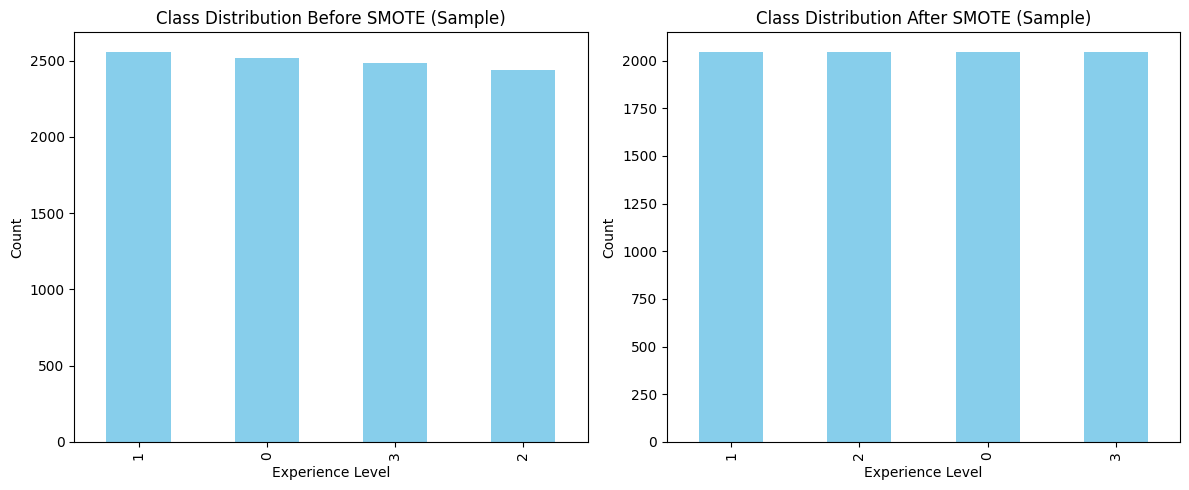

In [24]:

# Sample a subset of your data for faster visualization and testing
sample_size = 10000
encoded_cleaned_test = encoded_cleaned_test.sample(sample_size, random_state=42)

# Visualize class distribution before SMOTE for the sample
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
encoded_cleaned_test['Type_of_order'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Class Distribution Before SMOTE (Sample)')
plt.xlabel('Type_of_order')
plt.ylabel('Count')

# Prepare data for modeling
X_sample = pd.get_dummies(encoded_cleaned_test.drop(['Type_of_order'], axis=1))
y_sample = encoded_cleaned_test['Type_of_order']

# Handle NaN values using simple imputation
imputer = SimpleImputer(strategy='mean')  # You can use other strategies as needed
X_sample_imputed = pd.DataFrame(imputer.fit_transform(X_sample), columns=X_sample.columns)

# Determine the appropriate number of neighbors
n_neighbors = min(5, X_sample_imputed.shape[0] - 1)  # Set an appropriate maximum value
if n_neighbors >= X_sample_imputed.shape[0]:
    n_neighbors = X_sample_imputed.shape[0] - 1

# Split the sample dataset into training and testing sets
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(
    X_sample_imputed, y_sample, test_size=0.2, random_state=42
)

# Apply SMOTE to balance the sample dataset
smote = SMOTE(random_state=42, k_neighbors=min(n_neighbors, X_train_sample.shape[0] - 1))
X_train_resampled_sample, y_train_resampled_sample = smote.fit_resample(
    X_train_sample, y_train_sample
)

# Visualize class distribution after SMOTE for the sample
plt.subplot(1, 2, 2)
pd.Series(y_train_resampled_sample).value_counts().plot(kind='bar', color='skyblue')
plt.title('Class Distribution After SMOTE (Sample)')
plt.xlabel('Type_of_order')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

#### Pastrimi i rows ne kolonen "Time_Orderd" te cilet nuk jane ne formatin e kohes

In [30]:
encoded_cleaned_test = encoded_cleaned_test[encoded_cleaned_test['Time_Orderd'].astype(str).str.match(r'^([01]?[0-9]|2[0-3]):[0-5][0-9]$')]


In [31]:
encoded_cleaned_test.to_csv('data_preprocessed/encoded_cleaned_resolved.csv', index=False)

#### Mostrimi 

In [32]:


# Random sampling from the dataset
sample_size = 20  # Define the sample size you want
sample = encoded_cleaned_test.sample(n=sample_size, random_state=42)  # Random state for reproducibility

# Display the sampled data
sample.head()

,ID,Delivery_person_ID,Order_Date,Time_Orderd,Road_traffic_density,Type_of_order
10502,0x3622,INDORES02DEL02,1/4/2022,18:40,3,2
1390,0xb3e9,CHENRES04DEL01,9/3/2022,11:55,0,1
4740,0xdf59,DEHRES03DEL01,16-02-2022,23:45,2,1
7445,0x1d86,HYDRES13DEL01,18-03-2022,20:25,1,2
2120,0x3cc0,INDORES010DEL02,8/3/2022,17:25,3,0


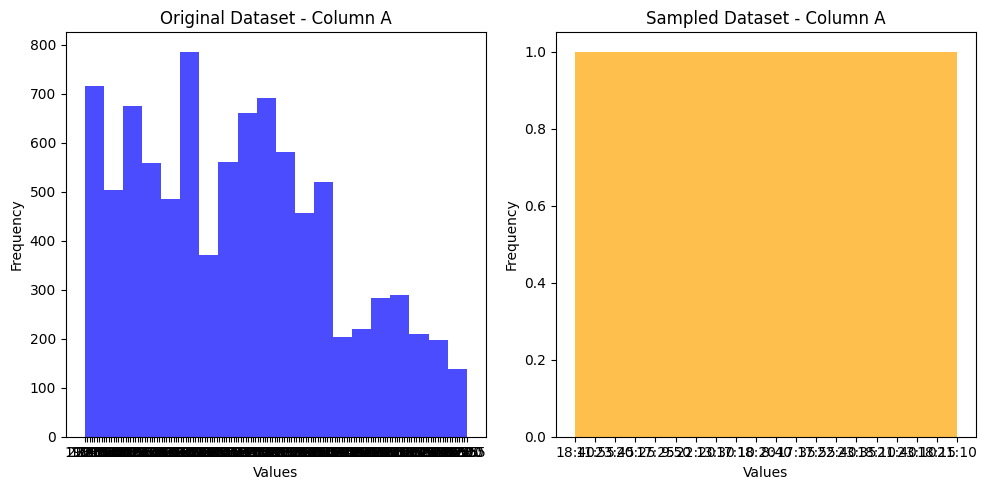

In [33]:
import matplotlib.pyplot as plt

# Assuming 'A' column is one of the columns in your dataset
plt.figure(figsize=(10, 5))

# Original dataset histogram
plt.subplot(1, 2, 1)
plt.hist(encoded_cleaned_test['Time_Orderd'], bins=20, color='blue', alpha=0.7)
plt.title('Original Dataset - Column A')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Sampled dataset histogram
plt.subplot(1, 2, 2)
plt.hist(sample['Time_Orderd'], bins=20, color='orange', alpha=0.7)
plt.title('Sampled Dataset - Column A')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

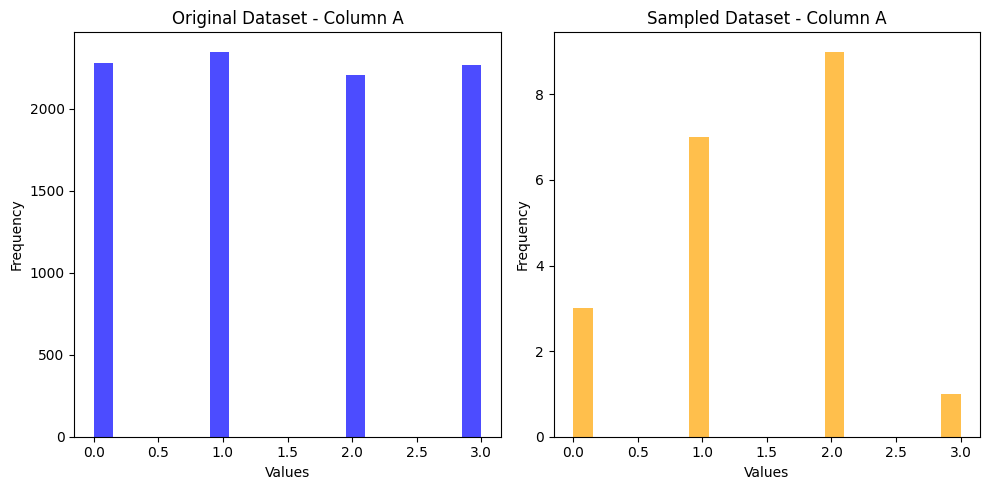

In [34]:
import matplotlib.pyplot as plt

# Assuming 'A' column is one of the columns in your dataset
plt.figure(figsize=(10, 5))

# Original dataset histogram
plt.subplot(1, 2, 1)
plt.hist(encoded_cleaned_test['Type_of_order'], bins=20, color='blue', alpha=0.7)
plt.title('Original Dataset - Column A')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Sampled dataset histogram
plt.subplot(1, 2, 2)
plt.hist(sample['Type_of_order'], bins=20, color='orange', alpha=0.7)
plt.title('Sampled Dataset - Column A')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##### Zgjedhja e nenbashkesive dhe transformimi i tyre - si nenbashkesi eshte perzgjedhur kolona Order_Date

In [ ]:
order_dates = encoded_cleaned_test['Order_Date']

formatted_dates = order_dates.dt.strftime('%d/%m/%Y')

encoded_cleaned_test['Order_Date'] = formatted_dates

print(formatted_dates)

##### Detektimi i Outliers

In [ ]:
encoded_cleaned_test['Order_Date'] = pd.to_datetime(encoded_cleaned_test['Order_Date'], format='%d/%m/%Y')

# Calculate the number of days since the minimum date
encoded_cleaned_test['Days_Since_Min_Date'] = (encoded_cleaned_test['Order_Date'] - encoded_cleaned_test['Order_Date'].min()).dt.days

# Calculate Z-scores
encoded_cleaned_test['Z_Score'] = np.abs((encoded_cleaned_test['Days_Since_Min_Date'] - encoded_cleaned_test['Days_Since_Min_Date'].mean()) / encoded_cleaned_test['Days_Since_Min_Date'].std())

threshold = 3
outliers_z = encoded_cleaned_test[encoded_cleaned_test['Z_Score'] > threshold]
print("Outliers identified by Z-Score method:")
print(outliers_z)

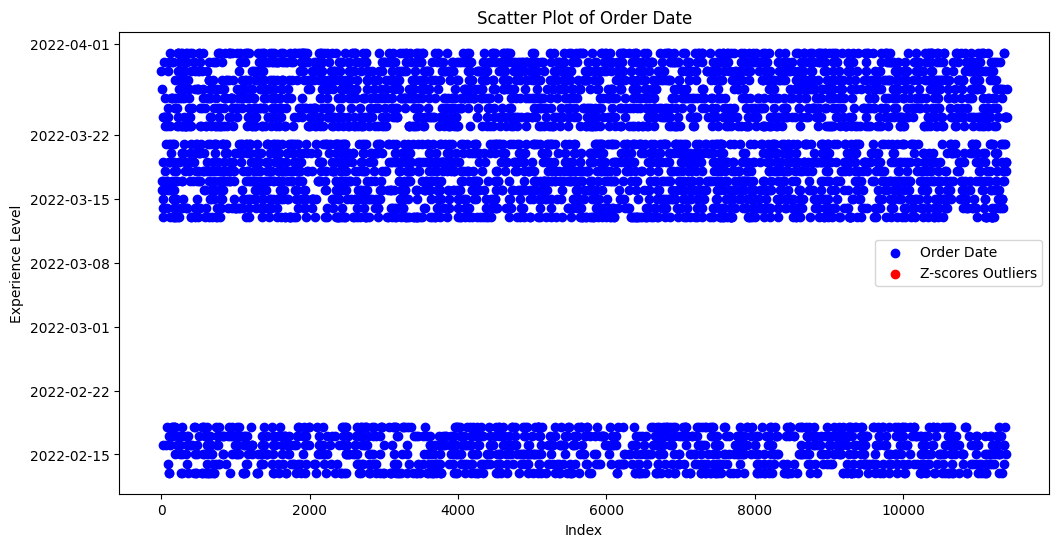

In [53]:
plt.figure(figsize=(12, 6))
plt.scatter(encoded_cleaned_test.index, encoded_cleaned_test['Order_Date'], color='blue', label='Order Date')

# Scatter plot for outliers
plt.scatter(outliers_z.index, outliers_z['Order_Date'], color='red', label='Z-scores Outliers')
plt.title("Scatter Plot of Order Date")
plt.xlabel("Index")
plt.ylabel("Experience Level")
plt.legend()
plt.show()

In [ ]:
encoded_cleaned_test['Time_Orderd'] = pd.to_datetime(encoded_cleaned_test['Time_Orderd'], format='%H:%M:%S')

# Calculate total minutes since midnight
encoded_cleaned_test['Minutes_Since_Midnight'] = encoded_cleaned_test['Time_Orderd'].dt.hour * 60 + encoded_cleaned_test['Time_Orderd'].dt.minute

# Calculate Z-scores
encoded_cleaned_test['Z_Score'] = np.abs((encoded_cleaned_test['Minutes_Since_Midnight'] - encoded_cleaned_test['Minutes_Since_Midnight'].mean()) / encoded_cleaned_test['Minutes_Since_Midnight'].std())

threshold = 3
outliers_z = encoded_cleaned_test[encoded_cleaned_test['Z_Score'] > threshold]
print("Outliers identified by Z-Score method for Time_Ordered:")
print(outliers_z)

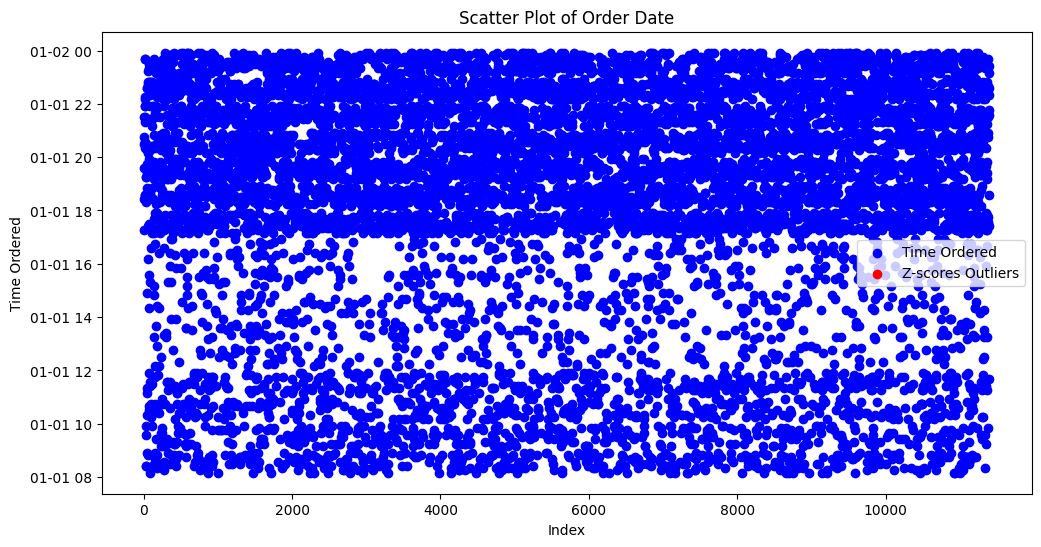

In [58]:
plt.figure(figsize=(12, 6))
plt.scatter(encoded_cleaned_test.index, encoded_cleaned_test['Time_Orderd'], color='blue', label='Time Ordered')

# Scatter plot for outliers
plt.scatter(outliers_z.index, outliers_z['Order_Date'], color='red', label='Z-scores Outliers')
plt.title("Scatter Plot of Order Date")
plt.xlabel("Index")
plt.ylabel("Time Ordered")
plt.legend()
plt.show()

##### Skewness data

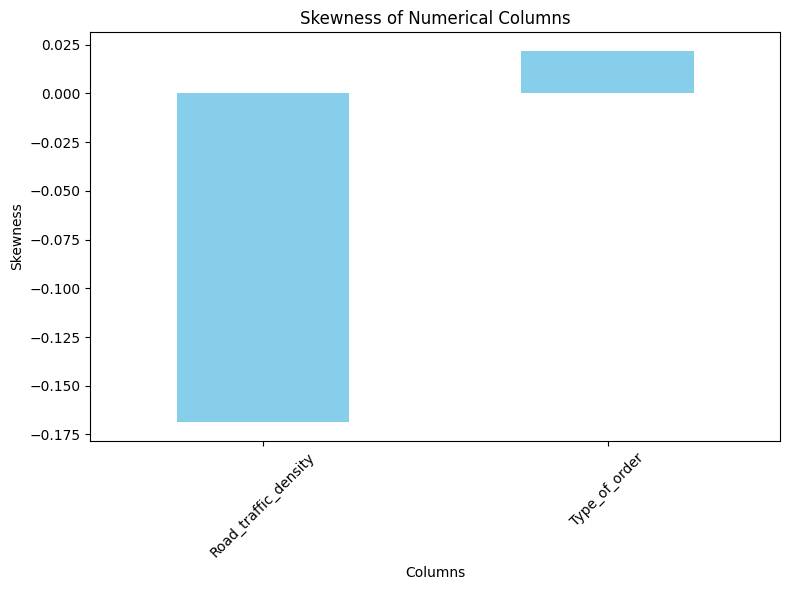

In [59]:
numerical_columns = ['Road_traffic_density', 'Type_of_order']

# Calculating skewness for numerical columns
skewness_values = encoded_cleaned_test[numerical_columns].skew()

# Visualizing skewness
plt.figure(figsize=(8, 6))
skewness_values.plot(kind='bar', color='skyblue')
plt.title('Skewness of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Separate the dataset into training and testing data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Convert 'Order_Date' column to datetime format if it's not already in datetime
encoded_cleaned_test['Order_Date'] = pd.to_datetime(encoded_cleaned_test['Order_Date'], errors='coerce')

# Splitting the data into features (X) and target variable (y)
X = encoded_cleaned_test.drop('Order_Date', axis=1)  # Features
y = encoded_cleaned_test['Order_Date']  # Target variable

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets to verify the split
print("Training set shape - X:", X_train.shape, " y:", y_train.shape)
print("Testing set shape - X:", X_test.shape, " y:", y_test.shape)

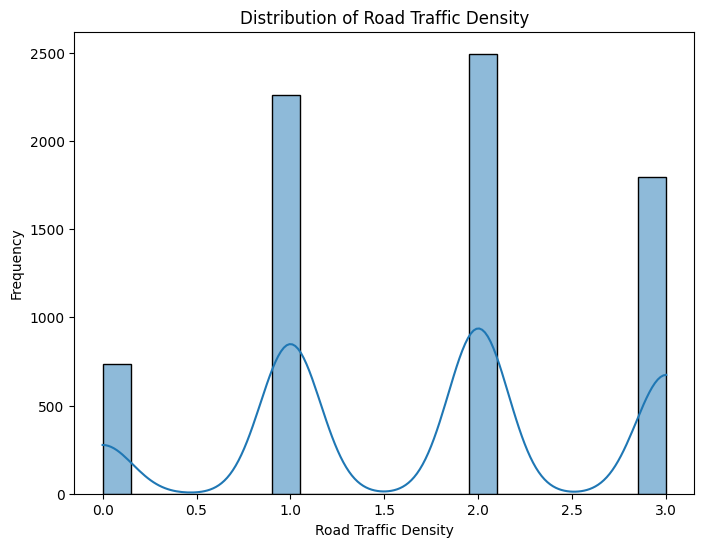

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train is the training dataset created earlier

# Visualizing the distribution of 'Road_traffic_density' in the training set
plt.figure(figsize=(8, 6))
sns.histplot(X_train['Road_traffic_density'], bins=20, kde=True)
plt.title('Distribution of Road Traffic Density')
plt.xlabel('Road Traffic Density')
plt.ylabel('Frequency')
plt.show()

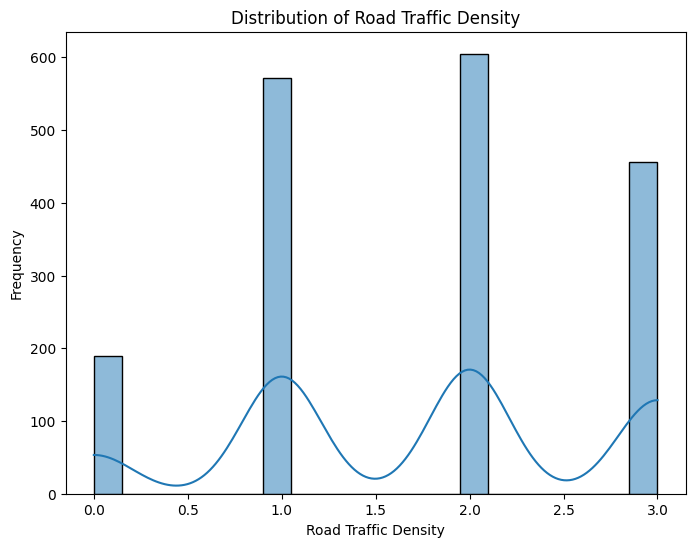

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train is the training dataset created earlier

# Visualizing the distribution of 'Road_traffic_density' in the training set
plt.figure(figsize=(8, 6))
sns.histplot(X_test['Road_traffic_density'], bins=20, kde=True)
plt.title('Distribution of Road Traffic Density')
plt.xlabel('Road Traffic Density')
plt.ylabel('Frequency')
plt.show()